# **Transfer Learning**

Pada praktikum Modul 6 anda **disarankan menggunakan Google Colab** dengan jenis runtime **GPU**

Anda diharus menggunakan dataset Colorectal Histology yang dapat diunduh melalui: https://www.tensorflow.org/datasets/catalog/colorectal_histology
dataset tersebut merupakan gambar segmentasi mikroskopis kanker usus besar (Colorectal Histology) dengan ukuran 150x150, 3 channel RGB berjumlah 5000 gambar

Pada dataset tersebut terdapat 8 jenis lapisan (tissue) class atau labels yaitu: 
- 0, tumor
- 1, stroma
- 2, complex
- 3, lympho
- 4, debris
- 5, mucosa
- 6, adipose
- 7, empty (background, no tissue)

Jika anda tertarik lebih lanjut mengenai dataset tersebut anda dapat melihat pada referensi paper berikut: https://www.nature.com/articles/srep27988

Tugas utama anda sesuai dengan yang ditunjukkan oleh Gambar 1. yaitu membuat model menggunakan metode Transfer Learning, anda dapat membuat model eksperiment pada bagian **eksperiment layer** dengan improvisasi dari penerapan modul sebelumnya. Anda diharuskan membuat **2 Model Percobaan** dengan kriteria:
- minimal **2 kombinasi pretrained architectures** yang berbeda sebagai ekstraksi fitur.
- training pembobotan dilakukan pada layer eksperiment dengan menerapkan improvisasi training pada modul sebelumnya
- referensi pretrained arsitektur yang terdapat pada keras dapat anda lihat di laman berikut: https://www.tensorflow.org/api_docs/python/tf/keras/applications

<img src = "https://i.imgur.com/4iskeo2.png" align="center">
<br/>
<h4>Gambar 1. Rancangan Model Kegiatan 6<h4/>

Untuk menguji hasil model experiment, anda diharuskan membagi dataset menjadi 20% sebagai data testing dan 80% sebagai data training sehingga jumlah hasil pembagian images menjadi:
- 1000 images testing
- 4000 images training

**Poin penilaian :**

* Tingkat kesesuaian code
* Tingkat kesesuaian output
* Kesesuaian step preprocessing dan pemodelan
* Kesesuaian jawaban dengan konten materi modul
* Penerapan improvisasi model sesuai dengan modul sebelumnya
* Pemahaman materi Tranfer Learning
* Kerapian kode program
* Total masing-masing point

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/modul6

/content/drive/MyDrive/modul6




---



---



# 1. Preprocessing (20 + 5 point)
task yang perlu dikerjakan:
- 1. load dataset, anda bisa menggunakan library tensorflow bernama tfds (disarankan) atau mengunduh secara manual (5 point)
- 2. membagi dataset dan menampilkan hasil pembagian (10 point)
- 3. menampilkan sample gambar colorectal histology (5 point)
- 4. normalisasi rescale gambar dan menerapkan image data generator jika diperlukan (tambahan 5 point jika menerapkan image data generator yang mencakup dari modul sebelumnya)


In [ ]:
# Hasil pengerjaan point 1.1 load dataset
import tensorflow_datasets as tfds

data, info = tfds.load('colorectal_histology',
                              split='train',
                              with_info=True,
                              download=True,
                              data_dir='/content/drive/MyDrive/modul6/')

Shuffling and writing examples to /content/drive/MyDrive/modul6/colorectal_histology/2.0.0.incompleteQH7SVK/colorectal_histology-train.tfrecord


Dataset colorectal_histology downloaded and prepared to /content/drive/MyDrive/modul6/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


In [ ]:
pip install split-folders

In [ ]:
# Hasil pengerjaan point 1.2
import splitfolders
base_dir='/content/drive/MyDrive/modul6'
data_dir='/content/drive/MyDrive/modul6/downloads/extracted/ZIP.zeno.org_reco_5316_file_Kath_text_2016_imaqL7TPMR0wf27knUqk31h7Z3Aye3ukvUAeDFu7zhZbcQ.zip/Kather_texture_2016_image_tiles_5000'
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 5000 files [01:07, 74.33 files/s]


In [ ]:
train_dir='/content/drive/MyDrive/modul6/train'
val_dir='/content/drive/MyDrive/modul6/val'

In [ ]:
import os
def count_em(valid_path):
  x = 0
  for root, dirs, files in os.walk(valid_path):
    for f in files:
      x = x+1
  return x
print("Train :",count_em(train_dir),"data")
print("Val :",count_em(val_dir),"data")

Train : 4000 data
Val : 1000 data


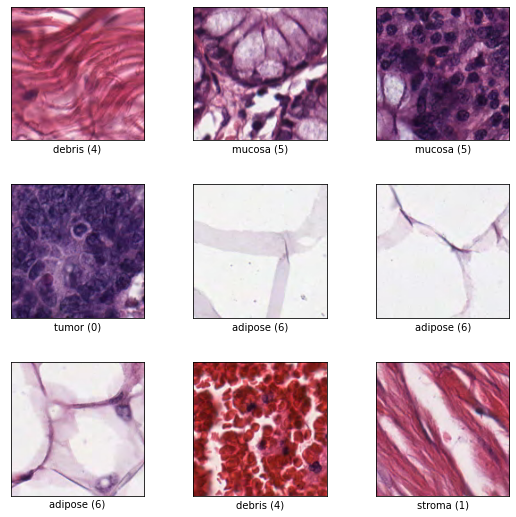

In [ ]:
# Hasil pengerjaan point 1.3
fig = tfds.show_examples(data,info)

In [ ]:
# Hasil pengerjaan point 1.4
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

Batch_size = 32
IMG_SIZE = 128
augmen_gen = ImageDataGenerator(rescale=1. / 255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_dir,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size=Batch_size,
    color_mode ='rgb'
)

aug=ImageDataGenerator(rescale=1. / 255)
val_gen = aug.flow_from_directory(
    val_dir,
    class_mode = 'categorical',
    shuffle=False,
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size=Batch_size,
    color_mode ='rgb'
)


Found 4000 images belonging to 8 classes.
Found 1000 images belonging to 8 classes.


# 2. Modelling (35 + 10 point)
Task yang perlu dikerjakan:
- 1. Membuat 2 Model Tranfer Learning menggunakan minimal 2 kombinasi pretrained architecture (20 point)
- 2. Melakukan training pembobotan pada layer eksperiment kemudian simpan model dengan hasil akurasi validasi paling tinggi (15 point)
- 3. Anda dapat menggunakan improvisasi pada modul sebelumnya dengan menggunakan dropout, regulizer, early stopping, callback training, grid search, dsb. (tambahan 10 point jika bisa menunjukkan peningkatan akurasi dari improvisasi model)

In [ ]:
#import library
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalMaxPooling2D, concatenate
from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB5, VGG16
from tensorflow.keras.optimizers import Adam

In [ ]:
inputan = (IMG_SIZE,IMG_SIZE,3)
input_model = Input(shape=inputan)

rn50v2 = ResNet50V2(include_top=False, weights="imagenet", input_shape=inputan)(input_model)
xception = Xception(include_top=False, weights="imagenet", input_shape=inputan)(input_model)
enb5= EfficientNetB5(include_top=False, weights="imagenet", input_shape=inputan)(input_model)
VGG16 = VGG16(include_top=False, weights="imagenet", input_shape=inputan)(input_model)

def pemodelan(m1,m2):
  model = concatenate([m1,m2])
  model = GlobalMaxPooling2D()(model)
  model = Flatten(name="flatten")(model)
  model = Dense(2048, activation="relu")(model)
  model = Dropout(0.35)(model)
  model = Dense(1024, activation="relu")(model)
  model = Dropout(0.35)(model)
  model = Dense(8, activation="softmax")(model)
  return model

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Hasil pengerjaan point 2.1 (model 1)
model1= pemodelan(rn50v2,VGG16)
pemodelan_1 = Model(inputs=input_model, outputs=model1)
pemodelan_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
resnet50v2 (Functional)         (None, 4, 4, 2048)   23564800    input_1[0][0]                    
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 4, 4, 512)    14714688    input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 4, 4, 2560)   0           resnet50v2[0][0]                 
                                                                 vgg16[0][0]                  

In [ ]:
# Hasil pengerjaan point 2.1 (model 2)
model2= pemodelan(enb5,xception)
pemodelan_2 = Model(inputs=input_model, outputs=model2)
pemodelan_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
efficientnetb5 (Functional)     (None, 4, 4, 2048)   28513527    input_1[0][0]                    
__________________________________________________________________________________________________
xception (Functional)           (None, 4, 4, 2048)   20861480    input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 4, 4, 4096)   0           efficientnetb5[0][0]             
                                                                 xception[0][0]             

In [ ]:
rn50v2.trainable = False
xception.trainable = False
enb5.trainable = False
VGG16.trainable = False

In [ ]:
import tensorflow as tf
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='./logs/aug')

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/aug

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
def callback(path):
  checkpoint_callback = ModelCheckpoint(path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
  reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000001, verbose=1)
  callbacks_list = [checkpoint_callback, reduce_callback]
  return callbacks_list

In [ ]:
best_model_path = 'best_model.h5'
cb=callback(best_model_path)

In [ ]:
learning_rate=0.0001
pemodelan_1.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=learning_rate),
             metrics='accuracy')

In [ ]:
# Hasil pengerjaan point 2.2 (model 1)
H = pemodelan_1.fit(train_gen, epochs=35,validation_data=val_gen, verbose=1, callbacks=[tensorboard,cb])

Epoch 1/35
125/125 [==============================] - 51s 292ms/step - loss: 2.7602 - accuracy: 0.4449 - val_loss: 0.5647 - val_accuracy: 0.8150

Epoch 00001: val_accuracy improved from -inf to 0.81500, saving model to best_model.h5
Epoch 2/35
125/125 [==============================] - 39s 314ms/step - loss: 0.6607 - accuracy: 0.7676 - val_loss: 0.3914 - val_accuracy: 0.8720

Epoch 00002: val_accuracy improved from 0.81500 to 0.87200, saving model to best_model.h5
Epoch 3/35
125/125 [==============================] - 36s 284ms/step - loss: 0.5113 - accuracy: 0.8306 - val_loss: 0.2924 - val_accuracy: 0.9000

Epoch 00003: val_accuracy improved from 0.87200 to 0.90000, saving model to best_model.h5
Epoch 4/35
125/125 [==============================] - 36s 280ms/step - loss: 0.4347 - accuracy: 0.8550 - val_loss: 0.2561 - val_accuracy: 0.9240

Epoch 00004: val_accuracy improved from 0.90000 to 0.92400, saving model to best_model.h5
Epoch 5/35
125/125 [==============================] - 36s 2

In [ ]:
best_model_path2 = 'best_model2.h5'
cb2=callback(best_model_path2)

In [ ]:
pemodelan_2.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=learning_rate),
             metrics='accuracy')

In [ ]:
H2 = pemodelan_2.fit(train_gen, epochs=35,validation_data=val_gen, verbose=1, callbacks=[tensorboard,cb2])

Epoch 1/35
125/125 [==============================] - 104s 649ms/step - loss: 1.7323 - accuracy: 0.4475 - val_loss: 2.5610 - val_accuracy: 0.2180

Epoch 00001: val_accuracy improved from -inf to 0.21800, saving model to best_model2.h5
Epoch 2/35
125/125 [==============================] - 75s 596ms/step - loss: 0.5442 - accuracy: 0.8210 - val_loss: 0.6122 - val_accuracy: 0.7850

Epoch 00002: val_accuracy improved from 0.21800 to 0.78500, saving model to best_model2.h5
Epoch 3/35
125/125 [==============================] - 75s 597ms/step - loss: 0.3641 - accuracy: 0.8778 - val_loss: 0.3408 - val_accuracy: 0.9010

Epoch 00003: val_accuracy improved from 0.78500 to 0.90100, saving model to best_model2.h5
Epoch 4/35
125/125 [==============================] - 75s 595ms/step - loss: 0.2822 - accuracy: 0.9084 - val_loss: 0.2328 - val_accuracy: 0.9260

Epoch 00004: val_accuracy improved from 0.90100 to 0.92600, saving model to best_model2.h5
Epoch 5/35
125/125 [==============================] - 

# 3. Report & Deploy (25 + 5 point):
Task yang perlu dikerjakan:
- 1. Load hasil penyimpanan model terbaik dari callback (5 point)
- 2. Membuat klasifikasi report dari 2 hasil model penyimpanan tersebut (10 point)
- 3. Uji coba pada 10 gambar untuk mendapatkan hasil label klafikasi gambar dari hasil model yang disimpan (10 point)
- 4. Menunjukkan history training kedua model melalui tensorboard (tambahan 5 point)

In [ ]:
# Hasil pengerjaan point 3.1 (model 1)
from tensorflow.keras.models import load_model

my_model = load_model("best_model.h5")
my_model2 = load_model("best_model2.h5")

In [ ]:
# Hasil pengerjaan point 3.2
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

ypred1 = my_model.predict(val_gen)
predictions = np.argmax(ypred1, axis = 1)
# labels = (ypred1 > 0.5).astype(np.int)
print("model 1:")
print(classification_report(val_gen.classes,predictions))

ypred2 = my_model2.predict(val_gen)
predictions2 = np.argmax(ypred2, axis = 1)
# labels = (ypred1 > 0.5).astype(np.int)
print("model 2:")
print(classification_report(val_gen.classes,predictions2))

model 1:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.88      0.91      0.89       125
           2       0.87      0.86      0.87       125
           3       0.94      0.95      0.95       125
           4       0.96      0.94      0.95       125
           5       0.98      0.99      0.99       125
           6       0.99      0.97      0.98       125
           7       0.99      0.99      0.99       125

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

model 2:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       125
           1       0.92      0.90      0.91       125
           2       0.84      0.91      0.87       125
           3       0.98      0.94      0.96       125
           4       0.98      0.96      0.97       125
      

In [ ]:
%tensorboard --logdir logs/aug

<IPython.core.display.Javascript object>

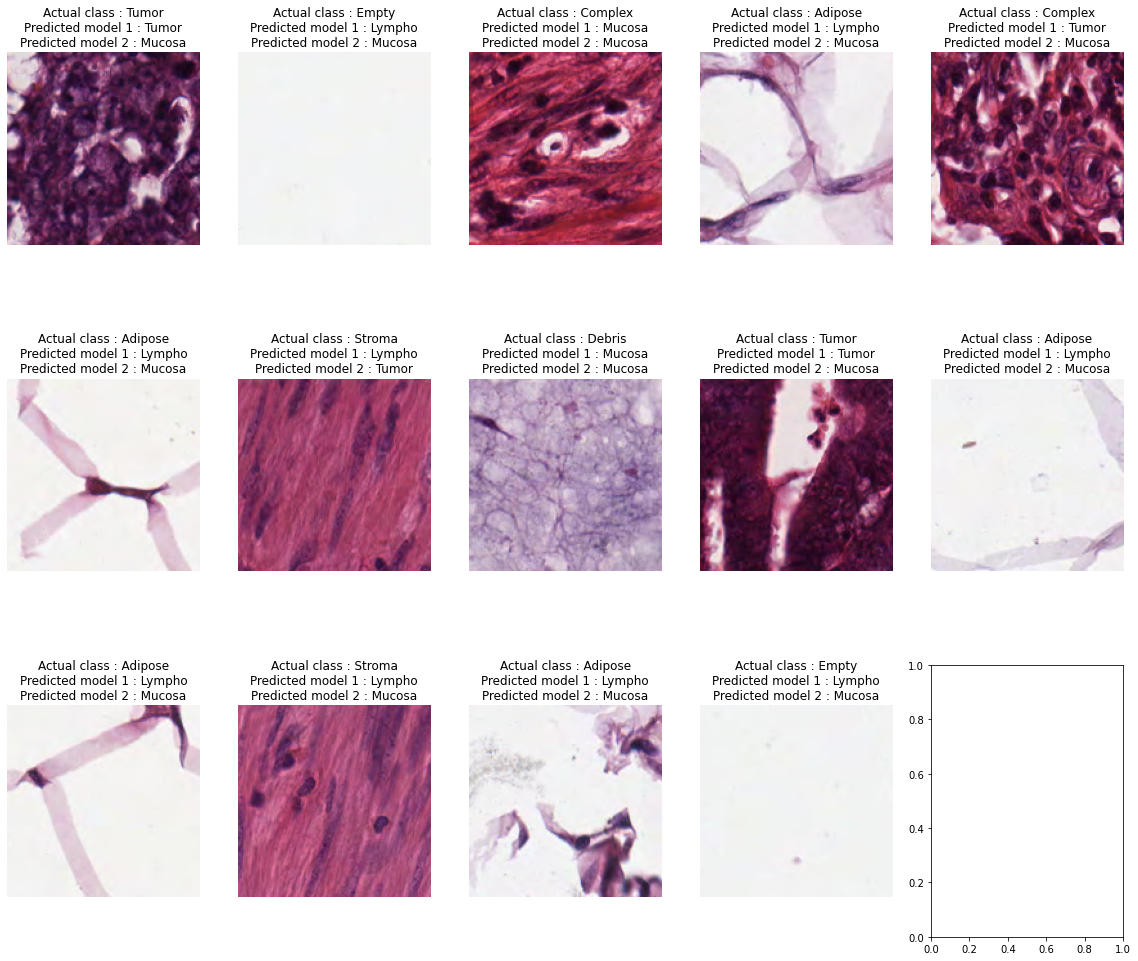

In [ ]:
import PIL
import random
import matplotlib.pyplot as plt

def predict(file):
  random_img = random.choice(file)
  img = PIL.Image.open(random_img)
  img_resized = img.resize((IMG_SIZE,IMG_SIZE),PIL.Image.LANCZOS)
  # x = image.img_to_array(img)
  x = np.expand_dims(np.array(img_resized), axis=0) #memperbesar dimensi supaya sama kayak inputan
  preds1 = my_model.predict(x)
  preds2 = my_model2.predict(x)

  def name (random_img):
    actual = random_img[34:40]
    if (actual=='01_TUM'):
      return 'Tumor'
    elif (actual=='02_STR'):
      return 'Stroma'
    elif (actual=='03_COM'):
      return 'Complex'
    elif (actual=='04_LYM'):
      return 'Lympho'
    elif (actual=='05_DEB'):
      return 'Debris'
    elif (actual=='06_MUC'):
      return 'Mucosa'
    elif (actual=='07_ADI'):
      return 'Adipose'
    elif (actual=='08_EMP'):
      return 'Empty'

  def predicted (pred):
    best_values = np.argmax(pred,axis=1)
    if (best_values == 0):
      return 'Tumor'
    elif (best_values == 1):
      return 'Stroma'
    elif (best_values == 2):
      return 'Complex'
    elif (best_values == 3):
      return 'Lympho'
    elif (best_values == 4):
      return 'Debris'
    elif (best_values == 5):
      return 'Mucosa'
    elif (best_values == 6):
      return 'Adipose'
    elif (best_values == 7):
      return 'Empty'

  plt.figure(1, figsize=(20, 17))
  plt.title(f'Actual class : {name(random_img)}\nPredicted model 1 : {predicted(preds1)}\nPredicted model 2 : {predicted(preds2)}')
  plt.imshow(img)
  plt.axis('off')
  plt.subplot(3, 5, n)

images = []
for folder in os.listdir(val_dir):
  for image in os.listdir(val_dir+ '/' + folder):
    images.append(os.path.join(val_dir, folder, image))

n = 0
for i in range(15):
  n += 1 
  predict(images)